### 1. Perkenalan
#### Dandy Alfikri
#### Batch 004
### Milestone 2 - Classification

Dalam Milestone kali ini, saya ingin mencoba membuat model klasifikasi mengenai dataset dari permainan online 'League of Legends' dengan dataset yang berjudul 'League Of Legends High elo Ranked Games(2020)' yang saya dapatkan di [Kaggle](https://www.kaggle.com/gyejr95/league-of-legends-challenger-ranked-games2020).

Dataset ini memiliki 50 jumlah kolom dengan beberapa kolom penting yaitu:
- gameDuration: Durasi game berjalan (detik)
- blueWins : Tim biru memenangkan pertandingan
- blueFirstBlood : Tim biru mendapatkan kill pertama dalam game
- blueFirstTower : Tim biru menghancurkan pertama kali dalam game
- blueFirstBaron : Tim biru membunuh objektif monster 'Baron'
- blueFirstInhibitor : Tim biru menghancurkan inhibitor pertama kali dalam game
- blueFirstDragon : Tim biru membunuh objektif monster 'Dragon'
- blueBaronKills : Jumlah monster 'Baron' yang di bunuh oleh tim biru
- blueTowerKills : Jumlah tower yang sudah di hancurkan oleh tim biru
- blueInhibitorKills : Jumlah inhibitor tower yang sudah di hancurkan oleh tim biru
- blueWardPlaced : Jumlah ward yang di pasang oleh tim biru
- blueWardKills : Jumlah ward yang sudah di hancurkan oleh tim biru
- blueKills : Jumlah kill yang tim biru dapatkan dalam game tersebut
- blueDeaths : Jumlah kematian yang tim biru dapatkan dalam game tersebut
- blueAssist : Jumlah assist yang tim biru dapatkan dalam game tersebut
- blueChampionDamageDealt : Jumlah damage yang didapatkan oleh tim biru terhadap hero musuh
- blueTotalGold : Jumlah gold yang dimiliki oleh tim biru
- blueTotalMinionKills : Jumlah creep/minion yang dibunuh oleh tim biru
- blueTotalLevel : Jumlah level yang di dapatkan dari tim biru
- blueAvgLevel : Rata-rata level yang di dapatkan dari tim biru
- blueJungleMinionKills : Jumlah creep/minion yang terbunuh dari game tersebut
- blueKillingSpree : Jumlah pembunuhan hero musuh secara beruntun
- blueTotalHeal : Total heal/penyembuhan dari tim biru
- blueObjectDamageDealt : Total damage dari tim biru terhadap tower musuh

Dan semua kolom yang ada di blueteam ada juga di dalam red team. sehingga menghasilkan jumlah fitur:
- 2 (Game Duration & Game ID)
- 24 (Blue team features)
- 24 (Red team features)

Objektif saya dalam Milestone ini adalah untuk menentukan tim mana yang menang berdasarkan fitur fitur di atas untuk rank Challenger (Tertinggi). Dengan asumsi semua pemain sudah bermain jauh lebih rapih dan lebih terstruktur dibanding rank yang dibawahnya.
<Br> Ruang Linkup saya dalam pengerjaan ini adalah, tidak adanya variabel yang mengantongi informasi mengenai item ataupun hero/champion yang di gunakan

Dalam dataset ini, ada 3 .csv file yang mencakup masing-masing rank tinggi di League of Legends (dengan order tertinggi ke ter-rendah)
- Challenger
- Grand Master
- Master

### 2. Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report

### 3. Data Loading

In [2]:
df = pd.read_csv('Challenger_Ranked_Games.csv')
df.head()

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4247263043,1323,0,1,0,0,0,0,0,0,...,68,73016,49832,533,64,12.8,138,8,38711,60463
1,4247155821,1317,1,0,0,0,1,0,2,0,...,8,44218,37136,571,59,11.8,134,3,24829,14105
2,4243963257,932,0,0,0,0,0,0,0,0,...,20,30797,35364,400,50,10.0,89,5,12589,45201
3,4241678498,2098,0,0,0,1,1,0,1,1,...,72,125866,70528,832,84,16.8,205,9,65312,88202
4,4241538868,2344,1,1,1,1,1,1,2,2,...,83,131536,74596,794,85,17.0,227,7,86431,64141


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26904 entries, 0 to 26903
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gameId                   26904 non-null  int64  
 1   gameDuraton              26904 non-null  int64  
 2   blueWins                 26904 non-null  int64  
 3   blueFirstBlood           26904 non-null  int64  
 4   blueFirstTower           26904 non-null  int64  
 5   blueFirstBaron           26904 non-null  int64  
 6   blueFirstDragon          26904 non-null  int64  
 7   blueFirstInhibitor       26904 non-null  int64  
 8   blueDragonKills          26904 non-null  int64  
 9   blueBaronKills           26904 non-null  int64  
 10  blueTowerKills           26904 non-null  int64  
 11  blueInhibitorKills       26904 non-null  int64  
 12  blueWardPlaced           26904 non-null  int64  
 13  blueWardkills            26904 non-null  int64  
 14  blueKills             

Kolom dari dataset yang saya gunakan sudah berbentuk Integer dan Float untuk bagian semua kolom. Maka, dalam data Preprocessing ataupun pembuatan pipeline saya tidak akan membuat Label Encoding ataupun One Hot Encoder

### 4. Data Cleaning (Standard Missing Value)

In [4]:
df.isnull().sum()

gameId                     0
gameDuraton                0
blueWins                   0
blueFirstBlood             0
blueFirstTower             0
blueFirstBaron             0
blueFirstDragon            0
blueFirstInhibitor         0
blueDragonKills            0
blueBaronKills             0
blueTowerKills             0
blueInhibitorKills         0
blueWardPlaced             0
blueWardkills              0
blueKills                  0
blueDeath                  0
blueAssist                 0
blueChampionDamageDealt    0
blueTotalGold              0
blueTotalMinionKills       0
blueTotalLevel             0
blueAvgLevel               0
blueJungleMinionKills      0
blueKillingSpree           0
blueTotalHeal              0
blueObjectDamageDealt      0
redWins                    0
redFirstBlood              0
redFirstTower              0
redFirstBaron              0
redFirstDragon             0
redFirstInhibitor          0
redDragonKills             0
redBaronKills              0
redTowerKills 

Dari dataset ini, dapat dilihat bahwa tidak ada standard missing value dalam DataFrame awal. Saya akan mencoba melihat apakah ada nilai yang spektakuler atau menonjol dengan syntax .describe() untuk masing-masing kolom 

In [5]:
df.drop('gameId',axis=1).describe().T #drop gameId dikarenakan tidak memiliki informasi yang penting

,count,mean,std,min,25%,50%,75%,max
gameDuraton,26904.0,1448.653657,422.577288,190.0,1152.00,1435.0,1738.00,3301.0
blueWins,26904.0,0.500074,0.500009,0.0,0.00,1.0,1.00,1.0
blueFirstBlood,26904.0,0.503531,0.499997,0.0,0.00,1.0,1.00,1.0
blueFirstTower,26904.0,0.525610,0.499353,0.0,0.00,1.0,1.00,1.0
blueFirstBaron,26904.0,0.244090,0.429554,0.0,0.00,0.0,0.00,1.0
blueFirstDragon,26904.0,0.406334,0.491157,0.0,0.00,0.0,1.00,1.0
blueFirstInhibitor,26904.0,0.367120,0.482029,0.0,0.00,0.0,1.00,1.0
blueDragonKills,26904.0,1.389719,1.247393,0.0,0.00,1.0,2.00,7.0
blueBaronKills,26904.0,0.307018,0.537140,0.0,0.00,0.0,1.00,4.0
blueTowerKills,26904.0,4.397562,3.327761,0.0,1.00,4.0,7.00,11.0


Dari table diatas, dapat dilihat bahwa banyak kolom yang berbentuk Boolean (0,1) dan ada beberapa continuous value. Dan tidak ada nilai yang extreme atau sangat menonjol dari dataframe tersebut. Tetapi, dibagian game Duration ada yang sedikit aneh yaitu minimum durasi game hanya berlangsung selama 190 detik (3+ menit). Maka nanti akan saya akan explore lebih dalam dari match yang durasinya hanya sebentar

### 4. Exploratory Data Analysis

Pertama-tama, Saya ingin melihat jumlah kolom yang nanti akan saya jadikan target yaitu apakah pemenang dalam game tersebut adalah Blue Team atau Red Team. Dengan Barchart dan Piechart

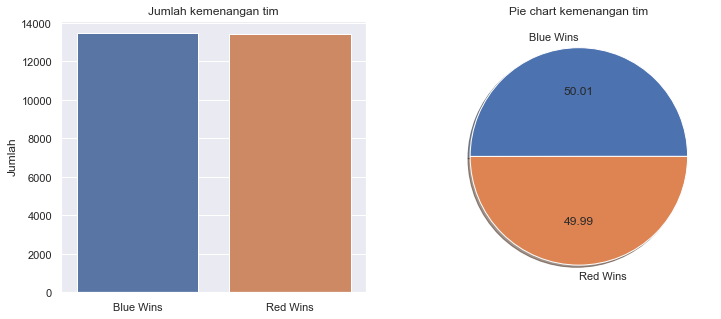

In [6]:
plot = df['blueWins'].copy()
plot.replace({
    1:'Blue Wins',
    0:'Red Wins'
},inplace=True)

fig = plt.figure(figsize=(12,5)) #penentuan panjang dan lebar figure plot
kolom = 2 #nentuan kolom dalam melakukan plotting
baris = 1 #penentuan baris dalam melakukan plotting
fig.add_subplot(baris,kolom,1)
ax=sns.barplot(x=plot.value_counts().index, y=plot.value_counts())
ax.set(ylabel='Jumlah')
plt.title('Jumlah kemenangan tim')
fig.add_subplot(baris,kolom,2)
plt.pie(plot.value_counts(), labels=plot.value_counts().index, shadow=True, autopct='%.2f')
plt.title('Pie chart kemenangan tim')
plt.show()

Dapat dilihat dari Pie chart dan bar plot di atas bahwa kemenangan dari tim biru dan tim merah bisa di bilang seimbang dengan nilai yang hanya berbeda sangat sedikit

Kemudian, Saya akan melihat distribusi durasi dari lama nya match berlangsung. Untuk melihat apakah ada yang janggal

In [7]:
# ada type dari dataset tersebut (duraton = duration)
df.rename(columns={'gameDuraton':'gameDuration'},inplace=True)

<AxesSubplot:xlabel='gameDuration', ylabel='Density'>

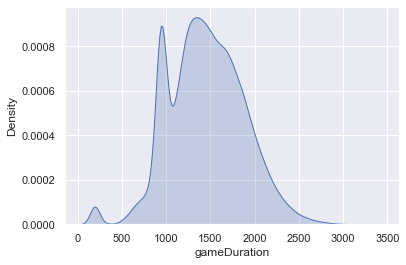

In [8]:
sns.kdeplot(df['gameDuration'], fill=True)

In [9]:
df['gameDuration'].describe()

count    26904.000000
mean      1448.653657
std        422.577288
min        190.000000
25%       1152.000000
50%       1435.000000
75%       1738.000000
max       3301.000000
Name: gameDuration, dtype: float64

Game rata-rata berlangsung di sekitar 1000-1700 detik atau sekitar 17 - 28 menit. Tetapi ada mini spike di sekitar 0-300 detik. Saya ingin melihat lebih dalam terhadap match-match tersebut

<AxesSubplot:xlabel='blueKills', ylabel='gameDuration'>

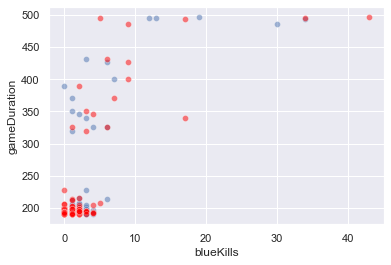

In [10]:
short = df[df['gameDuration'] < 500]
sns.scatterplot(x=short['blueKills'],y=short['gameDuration'],alpha=0.5)
sns.scatterplot(x=short['redKills'],y=short['gameDuration'], color='red',alpha=0.5)


Dikarenakan match-match tersebut density terbesar ada di jumlah kill yang kecil. Maka saya asumsikan bahwa adanya surrender dikarenakan ada teamate yang AFK atau keluar dari match ketika masih berlangsung. (Dikarenakan baru bisa menyatakan surrender atau menyerah seharusnya di menit 15). Maka data tersebut nanti akan saya buang di Data Cleaning untuk Non Standard Missing Value

In [11]:
short.describe()

,gameId,gameDuration,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
count,3.120000e+02,312.000000,312.000000,312.000000,312.000000,312.0,312.0,312.000000,312.0,312.0,...,312.00000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000
mean,4.182827e+09,205.387821,0.429487,0.432692,0.016026,0.0,0.0,0.012821,0.0,0.0,...,1.63141,2769.698718,5861.782051,38.766026,13.246795,2.649359,11.679487,0.198718,1155.240385,794.217949
std,6.527757e+07,49.275656,0.495798,0.496245,0.125776,0.0,0.0,0.112680,0.0,0.0,...,5.36351,4097.910372,4735.266460,20.810114,5.831502,1.166300,6.819668,0.955067,1394.737985,3070.005613
min,3.668187e+09,190.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.00000,0.000000,3340.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4.162438e+09,192.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.00000,1584.750000,4456.500000,30.000000,11.000000,2.200000,8.000000,0.000000,705.750000,0.000000
50%,4.198403e+09,194.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.00000,2113.000000,4862.500000,38.500000,12.000000,2.400000,12.000000,0.000000,995.000000,55.000000
75%,4.222437e+09,197.000000,1.000000,1.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,1.00000,2634.500000,5252.250000,45.000000,13.000000,2.600000,16.000000,0.000000,1285.000000,538.250000
max,4.260841e+09,497.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,0.0,0.0,...,57.00000,38712.000000,42612.000000,216.000000,44.000000,8.800000,56.000000,11.000000,18133.000000,33750.000000


Lalu, saya akan menampung fitur-fitur yang memiliki nama 'blue' dan 'red' di dalam kolom nya. Sehingga dapat mempermudah ketika penentuan kolom nanti

In [12]:
col = df.columns
blueCol = []
redCol = []
for i in col:
    if 'blue' in i:
        blueCol.append(i)
    elif 'red' in i:
        redCol.append(i)

Lalu saya memisahkan Boolean dan Continuous value features didalam dataset tersebut. Tetapi saya hanya menampung kedalam salah satu tim.

In [13]:
blueBool = ['blueWins']
blueCont = []
redBool = ['redWins']
redCont = []
for i in blueCol:
    if 'First' in i:
        blueBool.append(i)
    elif 'Wins' not in i:
        blueCont.append(i)
for i in redCol:
    if 'First' in i:
        redBool.append(i)
    elif 'Wins' not in i:
        redCont.append(i)

In [14]:
len(blueBool) + len(blueCont) + len(redBool) + len(redCont)

48

Jumlah semua kolom digabungkan adalah 48 dan bukan 50 dikarenakan saya tidak memasukan 'gameId' dan 'gameDuration' kedalam kolom tersebut

#### Blue Team Wins

In [15]:
print(df[(df['blueWins'] == 0) & (df['redWins'] == 0)].shape)
print(df[(df['blueWins'] == 1) & (df['redWins'] == 1)].shape)

(0, 50)
(0, 50)


Code di atas untuk melihat apakah ada situasi anomali dimana kedua tim sama sama menang atau sama sama kalah, dan ternyata tidak ada.

Pertama, Saya ingin tahu mengenai statistik match tersebut ketika tim biru memenangkan game nya. Maka saya akan melakukan query terlebih dahulu ketika tim biru memenangkan match.

In [16]:
blue_df = df[df['blueWins'] == 1]
blue_df.head(3)

,gameId,gameDuration,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
1,4247155821,1317,1,0,0,0,1,0,2,0,...,8,44218,37136,571,59,11.8,134,3,24829,14105
4,4241538868,2344,1,1,1,1,1,1,2,2,...,83,131536,74596,794,85,17.0,227,7,86431,64141
5,4241394461,1567,1,1,1,0,0,1,2,0,...,34,64242,44280,555,61,12.2,140,3,23741,20132


In [17]:
for i in blueBool:
    blue_df[i].replace({
        0:'Red First',
        1:'Blue First'
    },inplace=True)
blue_df['blueFirstBlood'].value_counts() #mengubah semua boolean menjadi string untuk plotting

Blue First    8163
Red First     5291
Name: blueFirstBlood, dtype: int64

Plotting untuk setiap boolean fitur dalam dataframe apabila tim biru menang

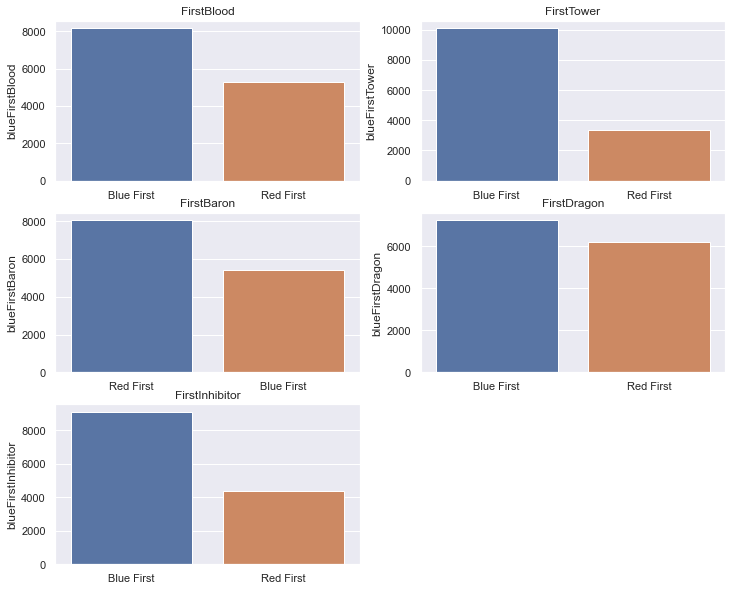

In [18]:
fig = plt.figure(figsize=(12,10)) #penentuan panjang dan lebar figure plot
kolom = 2 #nentuan kolom dalam melakukan plotting
baris = 3 #penentuan baris dalam melakukan plotting
for i in range (1,len(blueBool)):
    fig.add_subplot(baris,kolom,i)
    plt.title(f'{blueBool[i][4:]}')
    sns.barplot(y=blue_df[blueBool[i]].value_counts(),x=blue_df[blueBool[i]].value_counts().index)

Dari graph di atas, dapat dilihat ketika tim biru menang, mayoritas objektif yang pertama dilakukan oleh dari tim biru itu sendiri. Dan, probabilitas paling terjamin ketika tim biru mendapatkan Inhibitor tower dan Tower pertama. Lalu saya akan melanjutkan kearah continuous columns

In [19]:
len(blueCont)

18

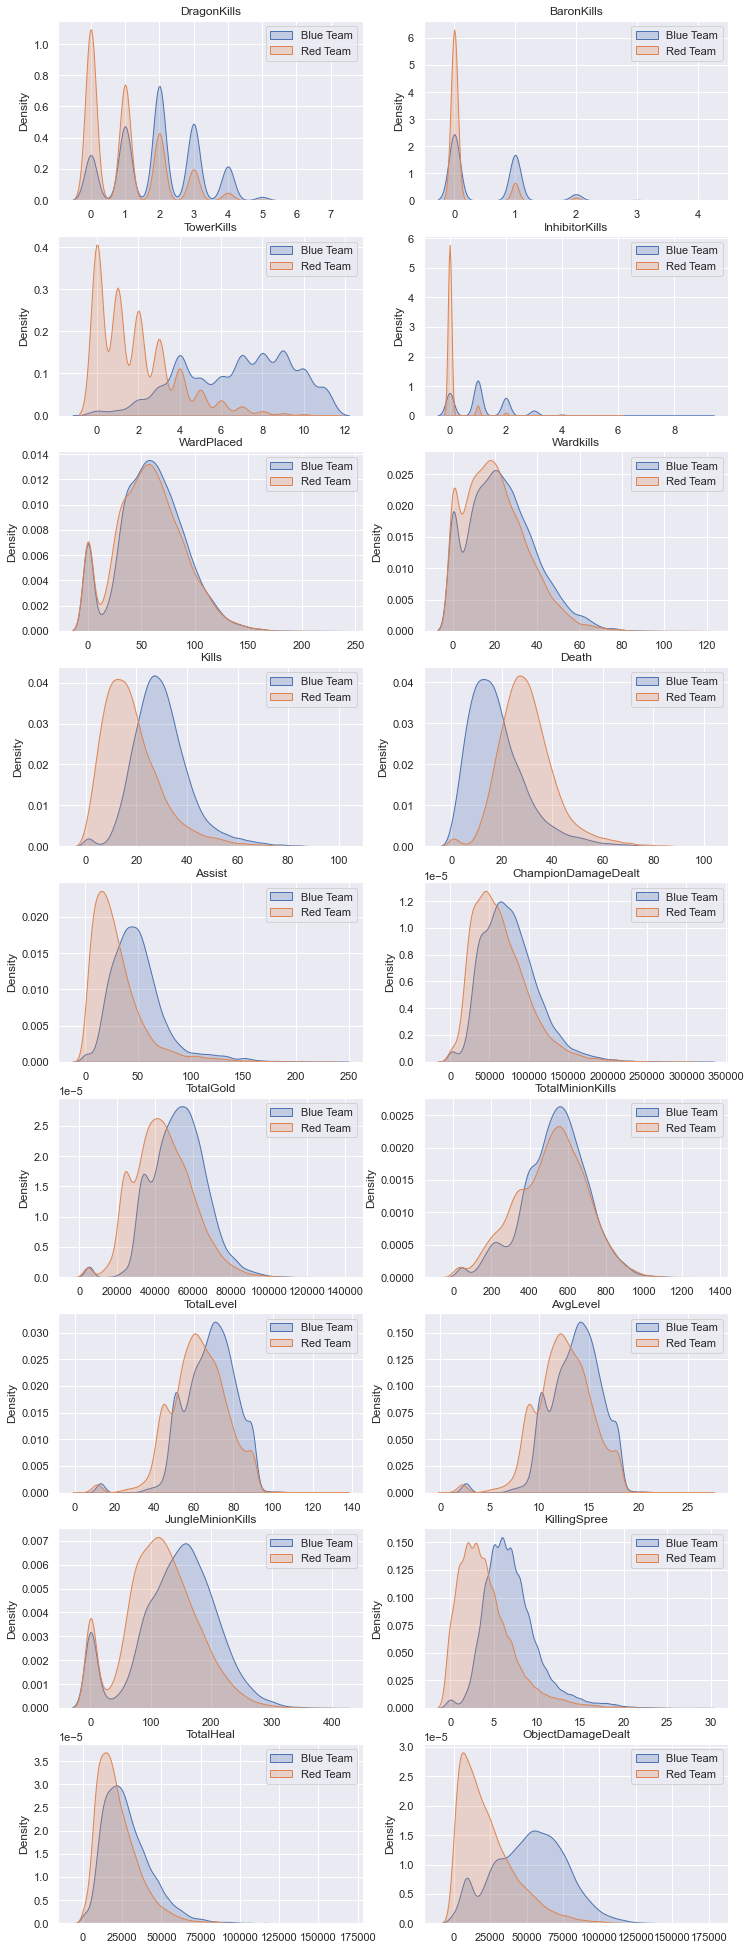

In [20]:
fig = plt.figure(figsize=(12,35)) #penentuan panjang dan lebar figure plot
kolom = 2 #nentuan kolom dalam melakukan plotting
baris = 9 #penentuan baris dalam melakukan plotting
for i in range (0,len(blueCont)):
    fig.add_subplot(baris,kolom,i+1)
    plt.title(f'{blueCont[i][4:]}')
    ax=sns.kdeplot(blue_df[blueCont[i]],fill=True, label='Blue Team')
    sns.kdeplot(blue_df[redCont[i]],fill=True, label='Red Team')
    plt.legend(labels=['Blue Team','Red Team'])
    ax.set(xlabel=None)

Dari beberapa graph di atas dapat disimpulkan bahwa:
- Ketika tim biru menang, tim biru membunuh objektif 'Baron' lebih sering
- Tower yang dihancurkan tim biru jauh lebih tinggi tim merah ketika tim biru menang
- Average Level atau rata-rata level sering berujung dengan level yang sama (dikarenakan ada level cap)

#### Red Team Wins

In [21]:
red_df = df[df['blueWins'] == 0]
red_df.head(3)

,gameId,gameDuration,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4247263043,1323,0,1,0,0,0,0,0,0,...,68,73016,49832,533,64,12.8,138,8,38711,60463
2,4243963257,932,0,0,0,0,0,0,0,0,...,20,30797,35364,400,50,10.0,89,5,12589,45201
3,4241678498,2098,0,0,0,1,1,0,1,1,...,72,125866,70528,832,84,16.8,205,9,65312,88202


In [22]:
for i in redBool:
    red_df[i].replace({
        0:'Blue First',
        1:'Red First'
    },inplace=True)
red_df['redFirstBlood'].value_counts() #mengubah semua boolean menjadi string untuk plotting

Red First     8045
Blue First    5405
Name: redFirstBlood, dtype: int64

Lalu, saya akan melakukan plotting untuk boolean features ketika tim merah menang

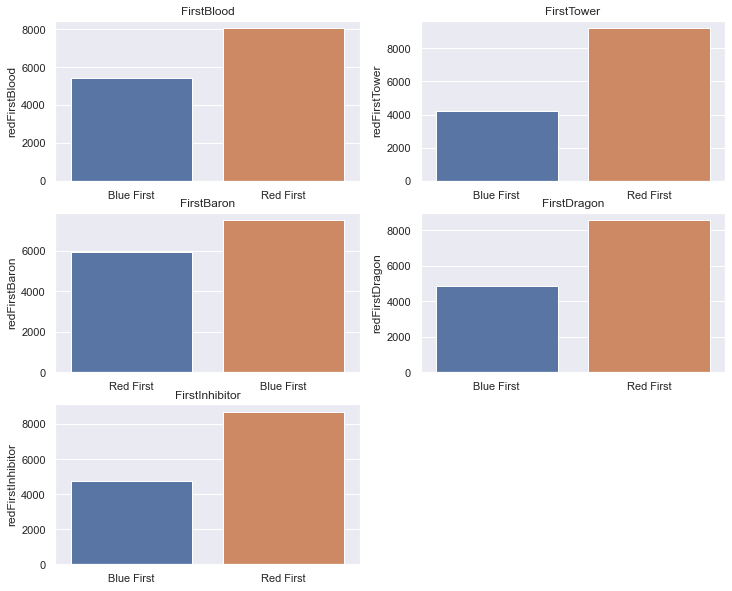

In [23]:
fig = plt.figure(figsize=(12,10)) #penentuan panjang dan lebar figure plot
kolom = 2 #nentuan kolom dalam melakukan plotting
baris = 3 #penentuan baris dalam melakukan plotting
for i in range (1,len(redBool)):
    fig.add_subplot(baris,kolom,i)
    plt.title(f'{redBool[i][3:]}')
    sns.barplot(y=red_df[redBool[i]].value_counts().sort_values(),
                x=red_df[redBool[i]].value_counts().sort_values().index)

Mirip dengan apabila tim biru menang, graph yang paling signifikan terjadi ketika mendapatkan tower dan inhibitor tower pertama

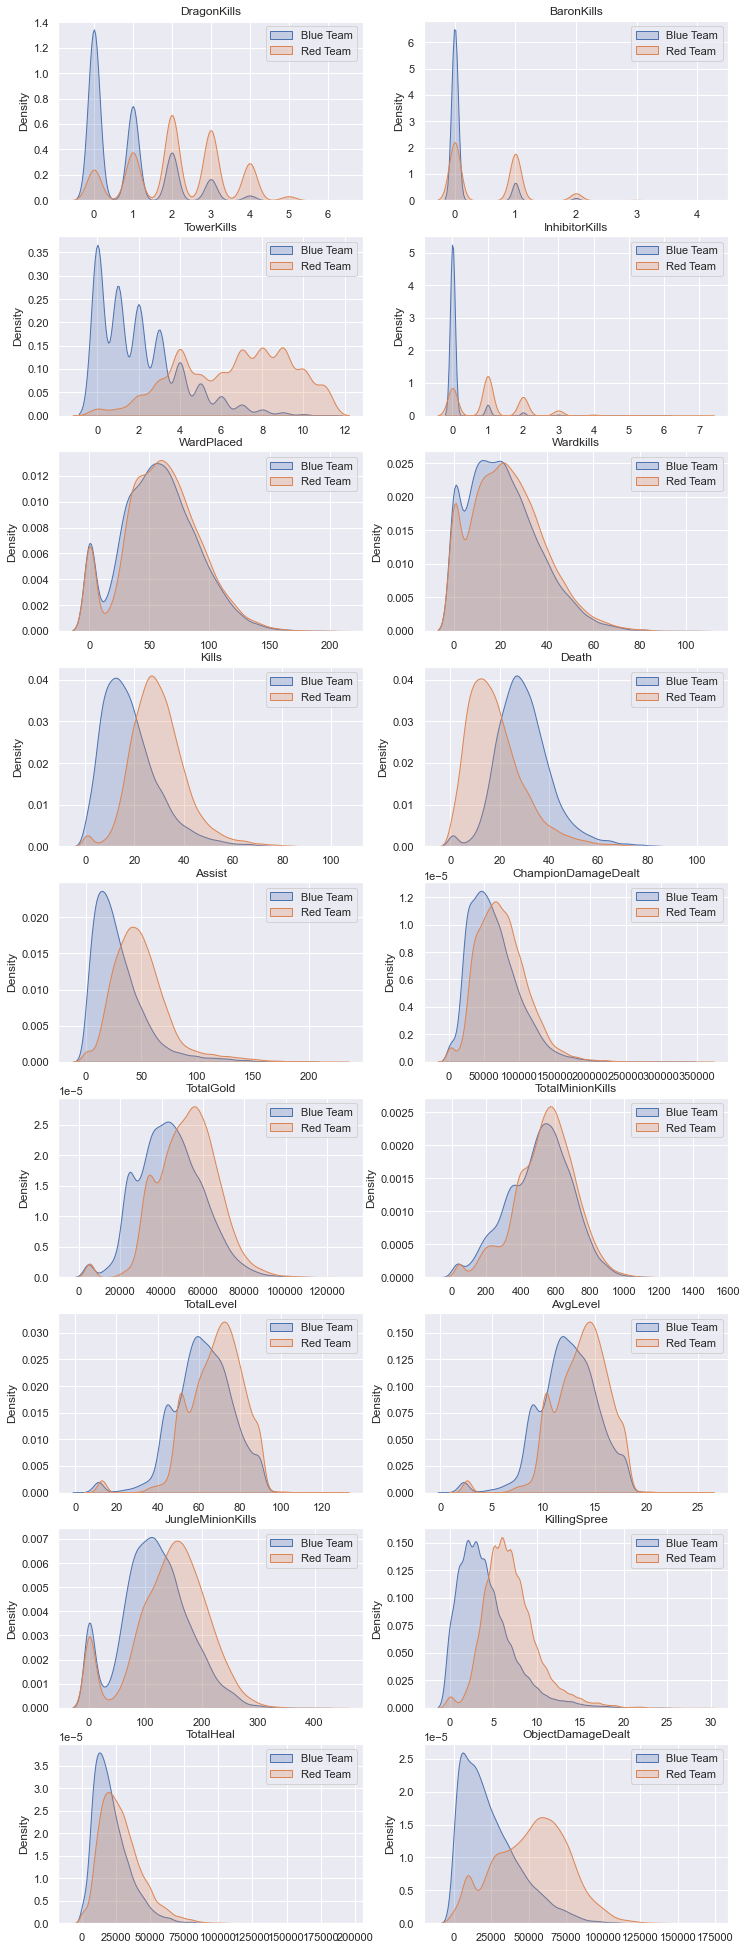

In [24]:
fig = plt.figure(figsize=(12,35)) #penentuan panjang dan lebar figure plot
kolom = 2 #nentuan kolom dalam melakukan plotting
baris = 9 #penentuan baris dalam melakukan plotting
for i in range (0,len(redCont)):
    fig.add_subplot(baris,kolom,i+1)
    plt.title(f'{redCont[i][3:]}')
    ax=sns.kdeplot(red_df[blueCont[i]],fill=True, label='Blue Team')
    sns.kdeplot(red_df[redCont[i]],fill=True, label='Red Team')
    plt.legend(labels=['Blue Team','Red Team'])
    ax.set(xlabel=None)

Graph continuous di atas juga menunjukan hal yang mirip ketika tim biru memenangkan pertandingan. Jadi yang bisa saya simpulkan adalah, match disini cukup fair dan hampir tidak advantage/disadvantage apabila menjadi Tim biru ataupun tim merah. Maka saya asumsikan, menjadi tim biru ataupun tim merah tidak memberikan faktor kemenangan game tersebut

#### Both Team

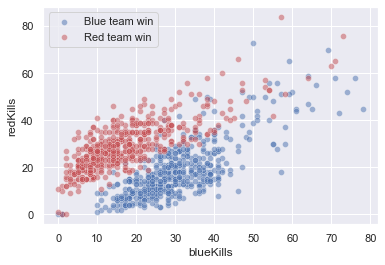

In [25]:
sns.scatterplot(x=blue_df['blueKills'][:500],y=blue_df['redKills'][:500],color='b',alpha=0.5)
sns.scatterplot(x=red_df['blueKills'][:500],y=red_df['redKills'][:500],color='r',alpha=0.5)
plt.legend(['Blue team win','Red team win'])

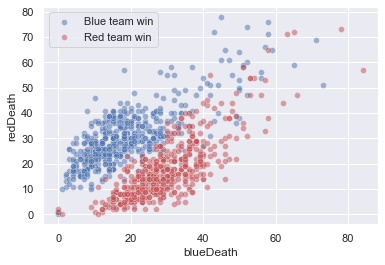

In [26]:
sns.scatterplot(x=blue_df['blueDeath'][:500],y=blue_df['redDeath'][:500],color='b',alpha=0.5)
sns.scatterplot(x=red_df['blueDeath'[:500]],y=red_df['redDeath'][:500],color='r',alpha=0.5)
plt.legend(['Blue team win','Red team win'])

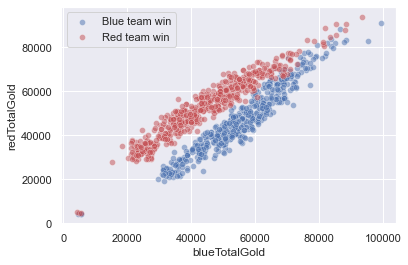

In [27]:
sns.scatterplot(x=blue_df['blueTotalGold'][:500],y=blue_df['redTotalGold'][:500],color='b',alpha=0.5)
sns.scatterplot(x=red_df['blueTotalGold'[:500]],y=red_df['redTotalGold'][:500],color='r',alpha=0.5)
plt.legend(['Blue team win','Red team win'])

Melihat korelasi antar fitur terhadap target (kemenangan tim)

In [28]:
df_corr = df.drop(['gameId'],axis=1).corr()['blueWins'].sort_values(ascending=True)
df_corr[1:-1]

redTowerKills             -0.709306
redFirstInhibitor         -0.622811
redObjectDamageDealt      -0.548136
redInhibitorKills         -0.547457
redDragonKills            -0.467407
redFirstTower             -0.446742
redKills                  -0.441799
blueDeath                 -0.439782
redKillingSpree           -0.411601
redFirstBaron             -0.394066
redBaronKills             -0.381037
redAssist                 -0.356230
redTotalGold              -0.270733
redFirstDragon            -0.267998
redJungleMinionKills      -0.231264
redTotalHeal              -0.222140
redAvgLevel               -0.215335
redTotalLevel             -0.215335
redFirstBlood             -0.207341
redChampionDamageDealt    -0.173693
redWardkills              -0.087605
redTotalMinionKills       -0.083117
redWardPlaced             -0.050044
gameDuration              -0.001414
blueWardPlaced             0.037542
blueWardkills              0.070485
blueTotalMinionKills       0.078853
blueChampionDamageDealt    0

Korelasi antar fitur

#### Blue Team dataframe correlation

In [29]:
blue_df = df[blueBool].copy()
blue_df = pd.concat([blue_df,df[blueCont]],axis=1)
blue_df['gameDuration'] = df['gameDuration'].copy()

Saya akan membuat korelasi antar fitur dengan threshold 0.5 yang ditampilkan agar lebih mudah di lihat mana yang berkorelasi secara linear dan mana yang mengandung multicollinearity

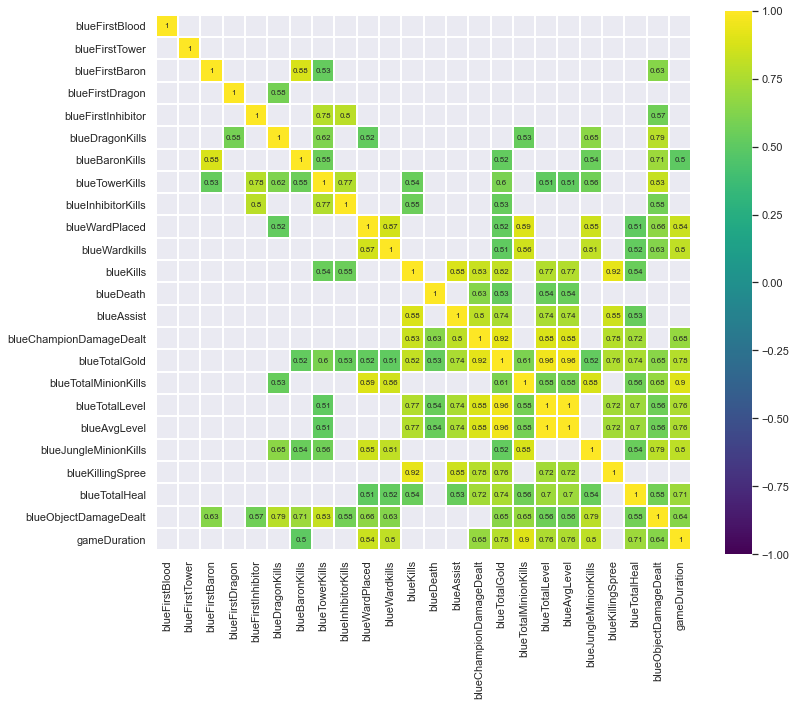

In [30]:
corr = blue_df.drop('blueWins',
               axis=1).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

Lalu, dapat dilihat dari correlation di atas dapat disimpulkan bahwa:
- blueAvgLevel & blueTotalLevel berkorelasi secara sempurna. Maka dari itu, nanti saya akan menghilangkan fitur tersebut di tahap preprocessing (blueAvgLevel)
- blueKills & blueKillingSpree berkorelasi sangat tinggi yaitu di angka 92%. Dikarenakan killing spree dapat terjadi apabila menyentuh lebih dari 2 kill secara beruntun. Maka saya juga akan menghilangkan fitur tersebut di tahap preprocessing (blueKillingSpree)
- blueTotalGold & blueTotalLevel/blueAvgLevel memiliki korelasi yang cukup tinggi dikarenakan semakin tinggi level juga akan mendapatkan gold yang lebih mudah. Tetapi kedua fitur ini cukup di butuhkan.

Lalu saya melihat korelasi terhadap target saya nanti yaitu 'blueWins' (ketika tim biru menang)

In [31]:
blue_df.corr()['blueWins'].sort_values(ascending=True)

blueDeath                 -0.439782
gameDuration              -0.001414
blueWardPlaced             0.037542
blueWardkills              0.070485
blueTotalMinionKills       0.078853
blueChampionDamageDealt    0.180180
blueFirstBlood             0.206442
blueJungleMinionKills      0.207726
blueTotalHeal              0.215695
blueAvgLevel               0.226127
blueTotalLevel             0.226127
blueFirstDragon            0.267778
blueTotalGold              0.276481
blueBaronKills             0.355048
blueFirstBaron             0.366722
blueAssist                 0.372974
blueKillingSpree           0.420451
blueFirstTower             0.449065
blueKills                  0.453521
blueDragonKills            0.466442
blueObjectDamageDealt      0.525094
blueInhibitorKills         0.554367
blueFirstInhibitor         0.637521
blueTowerKills             0.708405
blueWins                   1.000000
Name: blueWins, dtype: float64

Dari korelasi terhadap target di atas, dapat di konklusikan bahwa:
- gameDuration hampir tidak ada hubungan secara linear terhadap target
- blueTowerKills memiliki korelasi tertinggi terhadap target dengan korelasi positif linear
- blueDeath atau jumlah kematian di tim biru memiliki korelasi linear negatif ter tinggi

#### Red Team Dataframe Correlation

In [32]:
red_df = df[redBool].copy()
red_df = pd.concat([red_df,df[redCont]],axis=1)
red_df['gameDuration'] = df['gameDuration'].copy()

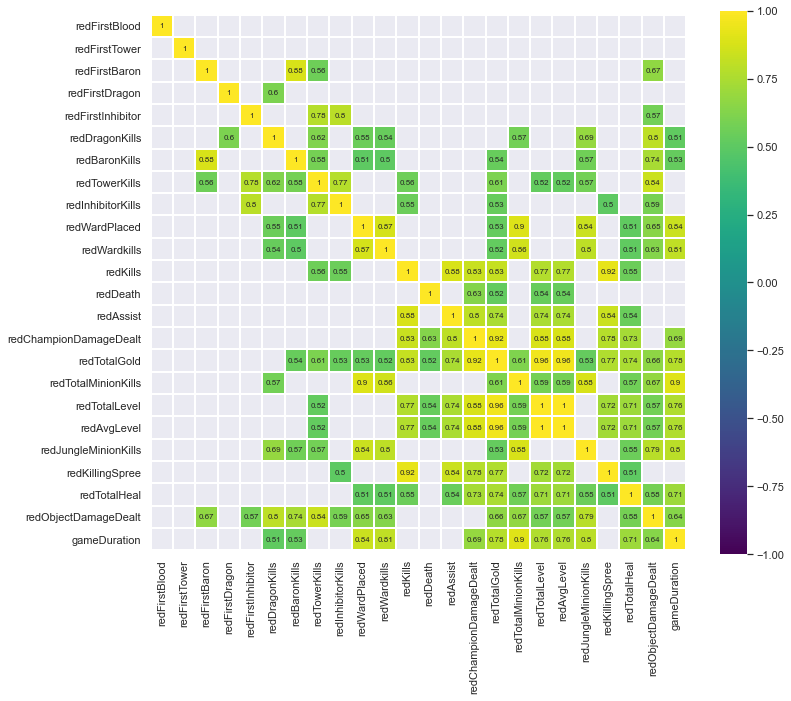

In [33]:
corr = red_df.drop('redWins',
               axis=1).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

Dan ternyata korelasi antar fitur sangat mirip dengan dataframe Tim Biru. Saya juga akan melihat untuk korelasi terhadap target untuk Tim Merah

In [34]:
red_df.corr()['redWins'].sort_values(ascending=True)

redDeath                 -0.451537
gameDuration              0.001414
redWardPlaced             0.050044
redTotalMinionKills       0.083117
redWardkills              0.087605
redChampionDamageDealt    0.173693
redFirstBlood             0.207341
redTotalLevel             0.215335
redAvgLevel               0.215335
redTotalHeal              0.222140
redJungleMinionKills      0.231264
redFirstDragon            0.267998
redTotalGold              0.270733
redAssist                 0.356230
redBaronKills             0.381037
redFirstBaron             0.394066
redKillingSpree           0.411601
redKills                  0.441799
redFirstTower             0.446742
redDragonKills            0.467407
redInhibitorKills         0.547457
redObjectDamageDealt      0.548136
redFirstInhibitor         0.622811
redTowerKills             0.709306
redWins                   1.000000
Name: redWins, dtype: float64

Dan saya juga mendapatkan hasil sesuai ekspektasi, yaitu mirip seperti blue teams. Maka dari itu, saya makin percaya bahwa blue teams atau red teams tidak ada advantage sama sekali. Maka dari itu saya hanya akan memilih beberapa fitur untuk dilakukan model training nanti

### 5. Data Preprocessing

Dikarenakan RedTeams dan BlueTeams sangat mirip / mirroring antara satu sama lain, maka saya akan mengambil :
- Blue Teams : Semua fitur (Boolean & Continuous).
- Red Teams : Continuous fitur saja
- gameDuration

In [35]:
final_df = blue_df.copy()
final_df = pd.concat([final_df,df[redCont]],axis=1)
final_df

,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,0,1,0,0,0,0,0,0,0,0,...,68,73016,49832,533,64,12.8,138,8,38711,60463
1,1,0,0,0,1,0,2,0,4,0,...,8,44218,37136,571,59,11.8,134,3,24829,14105
2,0,0,0,0,0,0,0,0,0,0,...,20,30797,35364,400,50,10.0,89,5,12589,45201
3,0,0,0,1,1,0,1,1,2,0,...,72,125866,70528,832,84,16.8,205,9,65312,88202
4,1,1,1,1,1,1,2,2,11,3,...,83,131536,74596,794,85,17.0,227,7,86431,64141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26899,0,1,0,0,0,0,1,0,0,0,...,40,75531,46558,478,64,12.8,141,6,48596,42733
26900,0,1,1,0,1,0,3,0,5,1,...,31,99837,70177,455,72,14.4,136,11,15817,50217
26901,0,1,1,0,1,0,1,0,4,0,...,34,55214,48849,636,66,13.2,175,6,25448,27675
26902,1,1,0,0,1,0,3,0,5,0,...,29,88366,52625,660,70,14.0,168,5,25003,45455


Lalu saya akan menghapus Average Level dan Killing Spree

In [36]:
final_df.drop(['blueAvgLevel','blueKillingSpree','redAvgLevel','redKillingSpree'],axis=1,inplace=True)

Dan saya juga akan menghapus Red Death dan Red Kills, dikarenakan pasti hampir berkorelasi linear dengan blue Death dan blue Kills.

In [37]:
final_df.drop(['redDeath','redKills'],axis=1,inplace=True)

In [38]:
final_df.shape

(26904, 37)

#### VIF (Variance Inflation Factor)

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = final_df.columns
vif_data["VIF"] = [variance_inflation_factor(final_df.values, i) for i in range(len(final_df.columns))]

vif_data

,feature,VIF
0,blueWins,12.387202
1,blueFirstBlood,2.241735
2,blueFirstTower,3.500205
3,blueFirstBaron,6.676758
4,blueFirstDragon,3.076504
5,blueFirstInhibitor,6.381831
6,blueDragonKills,18.517897
7,blueBaronKills,9.351795
8,blueTowerKills,32.228473
9,blueInhibitorKills,6.562488


Saya akan menghapus total minion kill dikarenakan minion kill dapat disimpulkan dari jumlah gold, jumlah objektif yang diselesaikan, dan sebagainya

In [40]:
final_df.drop(['blueTotalMinionKills','redTotalMinionKills'],axis=1,inplace=True)

In [41]:
corr = final_df.corr()['blueWins'].sort_values(ascending=True)
corr[abs(corr)<0.1]

redWardkills     -0.087605
redWardPlaced    -0.050044
gameDuration     -0.001414
blueWardPlaced    0.037542
blueWardkills     0.070485
Name: blueWins, dtype: float64

Saya juga akan melakukan dropping terhadap fitur yang memiliki korelasi terhadap target dibawah 10%

In [42]:
del_feat = corr[abs(corr)<0.1].index
final_df.drop(del_feat,axis=1,inplace=True)

Hasil fitur yang akan saya gunakan adalah seperti di code dibawah

In [43]:
final_df.columns

Index(['blueWins', 'blueFirstBlood', 'blueFirstTower', 'blueFirstBaron',
       'blueFirstDragon', 'blueFirstInhibitor', 'blueDragonKills',
       'blueBaronKills', 'blueTowerKills', 'blueInhibitorKills', 'blueKills',
       'blueDeath', 'blueAssist', 'blueChampionDamageDealt', 'blueTotalGold',
       'blueTotalLevel', 'blueJungleMinionKills', 'blueTotalHeal',
       'blueObjectDamageDealt', 'redDragonKills', 'redBaronKills',
       'redTowerKills', 'redInhibitorKills', 'redAssist',
       'redChampionDamageDealt', 'redTotalGold', 'redTotalLevel',
       'redJungleMinionKills', 'redTotalHeal', 'redObjectDamageDealt'],
      dtype='object')

#### Pembuatan Training , Validation, dan Test data

Pertama, saya akan memisahkan antara fitur dan label dari dataset saya menjadi variabel :
- X: menampung masing-masing fitur dari dataset
- y: menampung target (blueWins) dari dataset

In [44]:
X = final_df.drop(['blueWins'],axis=1).copy()
y = final_df['blueWins'].copy()

Dalam penyelesaian milestone ini saya akan membagi dataset saya menjadi 3 bagian
- Train set -> fit(scaler, classifier)
- Validation set -> transform (scaler), predict (classifier)
- Test set -> transform (scaler), predict (classifier)

In [45]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val =train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=1)
# 0.25 x 0.8 = 0.2 / 20%

In [46]:
print('\nJumlah data:',y_train.value_counts()[0])
print('Persentase blueTeam kalah (Training) :',
      round(y_train.value_counts()[0]/y_train.value_counts().sum()*100,2),'%')

print('\nJumlah data',y_train.value_counts()[1])
print('Persentase  blueTeam menang (Training) :',
      round(y_train.value_counts()[1]/y_train.value_counts().sum()*100,2),'%')

print('\nJumlah data:',y_val.value_counts()[0])
print('Persentase blueTeam kalah (Validation) :',
      round(y_val.value_counts()[0]/y_val.value_counts().sum()*100,2),'%')

print('\nJumlah data:',y_val.value_counts()[1])
print('Persentase blueTeam menang (Validation) :',
      round(y_val.value_counts()[1]/y_val.value_counts().sum()*100,2),'%')

print('\nJumlah data:',y_test.value_counts()[0])
print('Persentase blueTeam kalah (Testing) :',
      round(y_test.value_counts()[0]/y_test.value_counts().sum()*100,2),'%')

print('\nJumlah data:',y_test.value_counts()[1])
print('Persentase blueTeam menang (Testing) :',
      round(y_test.value_counts()[1]/y_test.value_counts().sum()*100,2),'%')



Jumlah data: 8014
Persentase blueTeam kalah (Training) : 49.65 %

Jumlah data 8128
Persentase  blueTeam menang (Training) : 50.35 %

Jumlah data: 2774
Persentase blueTeam kalah (Validation) : 51.55 %

Jumlah data: 2607
Persentase blueTeam menang (Validation) : 48.45 %

Jumlah data: 2662
Persentase blueTeam kalah (Testing) : 49.47 %

Jumlah data: 2719
Persentase blueTeam menang (Testing) : 50.53 %


Persentase untuk pembagian di bagian target sudah cukup adil atau dapat dibilang tidak imbalance. Maka saya dapat melanjutkan ke proses berikutnya

#### Anomaly Detection menggunakan Gaussian Mixtures

In [47]:
from sklearn.mixture import GaussianMixture
from time import time
t0 = time()

gm = GaussianMixture(n_components=2, n_init=10, random_state=42)
gm.fit(X_train)
print('time:',time()-t0)

time: 2.6681931018829346


In [48]:
gm.converged_

True

In [49]:
gm.n_iter_

9

Model untuk Gaussian Mixtures ini sudah menyentuh titik konvergensi dengan jumlah iterasi sebanyak 13x. Lalu saya akan langsung melakukan score sampling dan melihat data mana saja yang di anggap outlier

In [50]:
densities = gm.score_samples(X_train)
density_threshold = np.percentile(densities, 5)
anomalies = X_train[densities < density_threshold]

In [51]:
anomalies.shape

(808, 29)

Jumlah data anomali yang di tangkap oleh Gaussian Mixtures dengan jumlah cluster = 1 dan 5% dari total dataset ada sejumlah 808 data.

In [52]:
anomalies.columns

Index(['blueFirstBlood', 'blueFirstTower', 'blueFirstBaron', 'blueFirstDragon',
       'blueFirstInhibitor', 'blueDragonKills', 'blueBaronKills',
       'blueTowerKills', 'blueInhibitorKills', 'blueKills', 'blueDeath',
       'blueAssist', 'blueChampionDamageDealt', 'blueTotalGold',
       'blueTotalLevel', 'blueJungleMinionKills', 'blueTotalHeal',
       'blueObjectDamageDealt', 'redDragonKills', 'redBaronKills',
       'redTowerKills', 'redInhibitorKills', 'redAssist',
       'redChampionDamageDealt', 'redTotalGold', 'redTotalLevel',
       'redJungleMinionKills', 'redTotalHeal', 'redObjectDamageDealt'],
      dtype='object')

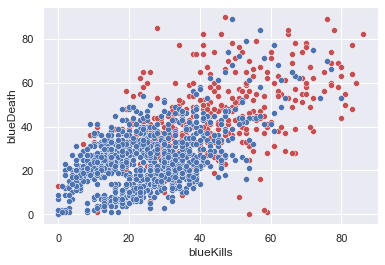

In [53]:
sns.scatterplot(x=anomalies['blueKills'][:500],y=anomalies['blueDeath'][:500],color='r')
sns.scatterplot(x=X_train['blueKills'][:1000],y=X_train['blueDeath'][:1000],color='b')
plt.show()


Dapat dilihat, banyak outliers yang dimana jumlah kill dan death dari tim biru sedikit diluar dari scope yang bukan di anggap outliers. 

In [54]:
anomalies.head()

,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueKills,...,redBaronKills,redTowerKills,redInhibitorKills,redAssist,redChampionDamageDealt,redTotalGold,redTotalLevel,redJungleMinionKills,redTotalHeal,redObjectDamageDealt
2648,0,0,0,0,0,1,0,4,0,36,...,2,8,1,106,179243,76096,85,234,59438,71770
18014,1,1,0,0,1,0,0,10,3,23,...,1,7,1,90,121121,72742,86,168,43908,82848
18406,0,0,1,0,0,1,2,7,0,45,...,0,7,1,43,128510,93313,90,149,24074,72025
9358,1,1,1,1,1,3,1,11,3,55,...,0,4,0,41,81920,67669,75,30,7073,22915
20952,1,1,0,0,0,0,0,2,0,19,...,2,9,1,60,99028,74500,84,209,77489,83167


Lalu saya akan menghapus data anomaly ini dari data training saya

In [55]:
X_cleaned_train = X_train.drop(anomalies.index,axis=0)
y_cleaned_train = y_train.drop(anomalies.index,axis=0)

In [56]:
X_cleaned_train.shape

(15334, 29)

In [57]:
y_cleaned_train.shape

(15334,)

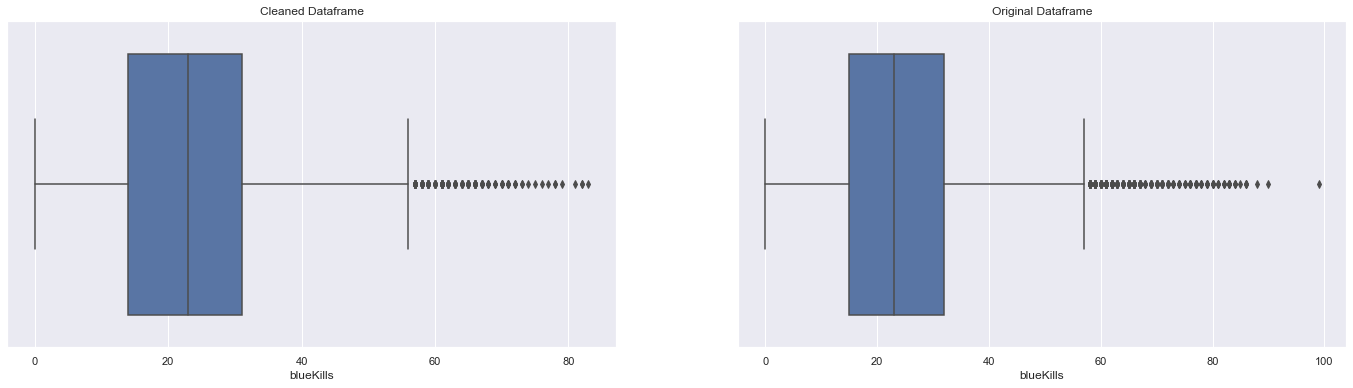

In [58]:
fig = plt.figure(figsize=(24, 6))
baris=1
kolom = 2
fig.add_subplot(baris,kolom,1)
plt.title('Cleaned Dataframe')
sns.boxplot(X_cleaned_train['blueKills'], orient='h')
fig.add_subplot(baris,kolom,2)
plt.title('Original Dataframe')
sns.boxplot(X_train['blueKills'], orient='h')
plt.show()

Dapat dilihat, bahwa range dari boxplot ini menurut dari 0-100 menjadi 0-80.

#### Data Scaling & pipeline

Di tahap ini, saya akan membuat pipeline yang berisikan standard scaler untuk membantu scaling terhadap dataset. Pertama, saya akan fitting menggunakan training data dahulu lalu melakukan cross validation terhadap data validasi yang tinggal di transform

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#### Pembuatan Pipeline untuk masing-masing Classifier

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
# Logistic Regression
lr_pipe = Pipeline([
        ('std_scaler', StandardScaler()),
        ('LogisticRegression',LogisticRegression(random_state=42))
    ])
#Random forest
rf_pipe = Pipeline([
#         ('std_scaler', StandardScaler()), Saya tidak melakukan scaling untuk tree based classifier
        ('Random Forest',RandomForestClassifier(random_state=42))
    ])
#XGBoost
xg_pipe = Pipeline([
#        ('std_scaler', StandardScaler()), Saya tidak melakukan scaling untuk tree based classifier
        ('XGBoost',XGBClassifier(random_state=42, verbosity=0)) #verbosity untuk ignore warning
    ])
#K N-Nearest Neighbor
knn_pipe = Pipeline([
        ('std_scaler', StandardScaler()),
        ('KNN',KNeighborsClassifier())
    ])

### Training dan Evaluation Models

#### Logistic Regression

##### Cross Validation Score using Validation dataset

In [61]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

t0=time()
lr_pipe.fit(X_cleaned_train,y_cleaned_train)
y_pred = lr_pipe.predict(X_val)
print("Accuracy: ",metrics.accuracy_score(y_val, y_pred)*100)
print('Confusion Matrix:')
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

print('Time:',time() - t0)

Accuracy:  99.10797249581861
Confusion Matrix:
[[2749   25]
 [  23 2584]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2774
           1       0.99      0.99      0.99      2607

    accuracy                           0.99      5381
   macro avg       0.99      0.99      0.99      5381
weighted avg       0.99      0.99      0.99      5381

Time: 0.14662432670593262


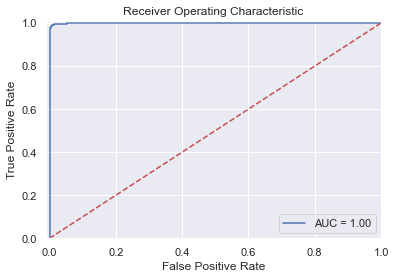

In [62]:
probs = lr_pipe.predict_proba(X_val)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_val, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Untuk Logistic Regression, hasil dari predict untuk validation set menyentuh 99.1% Dengan F1-Score 99%. dapat di lihat bahwa cukup bagus dengan akurasi setinggi ini dengan mencegah data leakage di awal. Nanti saya akan mencoba untuk melatihnya terhadap testing dataset 

#### Cross validation score

In [63]:
from sklearn.model_selection import cross_val_score
t0 = time()
lr_cv = cross_val_score(lr_pipe, X_train_val, y_train_val,scoring='accuracy', cv=5)
print(lr_cv)
print('Rata-rata akurasi terhadap training set',lr_cv.mean())
print('Time: ',time()-t0)

[0.99372822 0.99117305 0.99094077 0.99419145 0.99163569]
Rata-rata akurasi terhadap training set 0.9923338363362391
Time:  0.7264599800109863


Hasil dari Cross validation nya pun juga tidak berbeda jauh. (dataset = Train+Validation)
- Normal predict akurasi = 99.1%
- Cross Validation (K-Fold = 5) akurasi = 99.2%

#### Testing set 

In [64]:
lr_pipe.fit(X_train_val,y_train_val) #Melakukan fitting gabungan training+validation data set
y_pred = lr_pipe.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred)*100)
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print('Time:',time() - t0)

Accuracy:  99.03363687047018
Confusion Matrix:
[[2637   25]
 [  27 2692]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2662
           1       0.99      0.99      0.99      2719

    accuracy                           0.99      5381
   macro avg       0.99      0.99      0.99      5381
weighted avg       0.99      0.99      0.99      5381

Time: 0.9180035591125488


Dan ternyata, terhadap testing set juga mendapatkan hasil yang sangat optimal. Dengan mencapai nilai evaluasi untuk testing data yaitu di:
- Akurasi = 99%
- F1-Score = 99%

#### Random Forest

##### Cross Validation Score using Validation dataset

In [65]:
t0=time()
rf_pipe.fit(X_cleaned_train,y_cleaned_train)
y_pred = rf_pipe.predict(X_val)
print("Accuracy: ",metrics.accuracy_score(y_val, y_pred)*100)
print('Confusion Matrix:')
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

print('Time:',time() - t0)

Accuracy:  98.84779780709904
Confusion Matrix:
[[2743   31]
 [  31 2576]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2774
           1       0.99      0.99      0.99      2607

    accuracy                           0.99      5381
   macro avg       0.99      0.99      0.99      5381
weighted avg       0.99      0.99      0.99      5381

Time: 1.8433451652526855


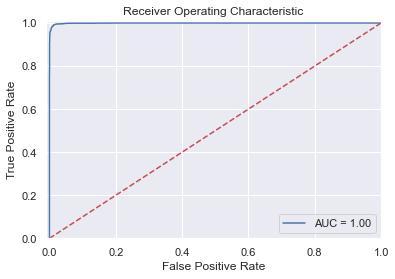

In [66]:
probs = rf_pipe.predict_proba(X_val)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_val, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Untuk Random Forest, dengan fitting training data dan melakukan prediksi berdasarkan validation data mendapatkan hasil:
- Akurasi : 98.8%
- F1 Score : 99%

##### Cross Validation Score using Validation dataset

In [67]:
t0 = time()
rf_cv = cross_val_score(rf_pipe, X_train_val, y_train_val,scoring='accuracy', cv=5)
print(rf_cv)
print('Rata-rata akurasi ',rf_cv.mean())
print('Time: ',time()-t0)

[0.98583043 0.9883856  0.98815331 0.98536245 0.98675651]
Rata-rata akurasi  0.9868976594173802
Time:  10.721797227859497


Dengan melakukan cross validation K-fold = 5 terhadap training+validation data set, mendapatkan rata rata akurasi di 98%

#### Testing set 

In [68]:
rf_pipe.fit(X_train_val,y_train_val) #gabungan training dan validation data
y_pred = rf_pipe.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred)*100)
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  98.88496561977328
Confusion Matrix:
[[2636   26]
 [  34 2685]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2662
           1       0.99      0.99      0.99      2719

    accuracy                           0.99      5381
   macro avg       0.99      0.99      0.99      5381
weighted avg       0.99      0.99      0.99      5381



Random forest juga mendapatkan akurasi yang sangat tinggi terhadap Testing data dengan model fitting training + validation data. Hasil:
- Akurasi : 98.9%
- F1-Score : 99%

#### XGBoost

##### Cross Validation Score using Validation dataset

In [69]:
t0=time()
xg_pipe.fit(X_cleaned_train,y_cleaned_train)
y_pred = xg_pipe.predict(X_val)
print("Accuracy: ",metrics.accuracy_score(y_val, y_pred)*100)
print('Confusion Matrix:')
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

print('Time:',time() - t0)

Accuracy:  98.95930124512172
Confusion Matrix:
[[2743   31]
 [  25 2582]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2774
           1       0.99      0.99      0.99      2607

    accuracy                           0.99      5381
   macro avg       0.99      0.99      0.99      5381
weighted avg       0.99      0.99      0.99      5381

Time: 1.18251371383667


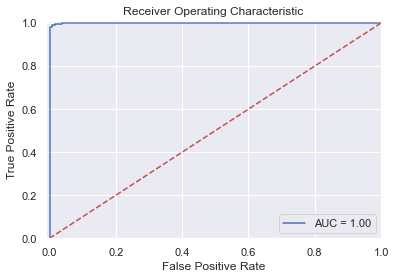

In [70]:
probs = xg_pipe.predict_proba(X_val)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_val, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

XGBoost pun sudah mendapatkan hasil yang sangat baik dan serupa seperti Random Forest yaitu hasil prediksi terhadap validasi dataset:
- Akurasi : 98.9%
- F1-Score : 99%

##### Cross Validation Score using Validation dataset

In [71]:
t0 = time()
xg_cv = cross_val_score(xg_pipe, X_train_val, y_train_val,scoring='accuracy', cv=5)
print(xg_cv)
print('Rata-rata akurasi ',xg_cv.mean())
print('Time: ',time()-t0)

[0.99070848 0.98977933 0.99001161 0.98907993 0.98954461]
Rata-rata akurasi  0.9898247909191784
Time:  6.720308303833008


Untuk Classifier XGBoost juga memiliki nilai akurasi yang tinggi dan mirip dengan akurasi terhadap validasi nya. Dengan rata-rata akurasi yaitu 99.0%

#### Testing set 

In [72]:
xg_pipe.fit(X_train_val,y_train_val) #gabungan training dan validation data
y_pred = xg_pipe.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred)*100)
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  99.16372421482997
Confusion Matrix:
[[2641   21]
 [  24 2695]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2662
           1       0.99      0.99      0.99      2719

    accuracy                           0.99      5381
   macro avg       0.99      0.99      0.99      5381
weighted avg       0.99      0.99      0.99      5381



Ketika melakukan prediksi terhadap testing data, nilai dari XGBoost memiliki akurasi yang lebih tinggi dari Random Forest. Maka dari itu, saya dapat simpulkan bahwa XGBoost memiliki regularisasi yang lebih optimal dibandingkan random forest, dan lebih goodfit dibandingkan dengan random forest (walaupun hanya berbeda sedikit) dengan hasil:
- Akurasi = 99.1%
- F1-Score = 99%

#### K-Nearest Neighbor

In [73]:
t0=time()
knn_pipe.fit(X_cleaned_train,y_cleaned_train)
y_pred = knn_pipe.predict(X_val)
print("Accuracy: ",metrics.accuracy_score(y_val, y_pred)*100)
print('Confusion Matrix:')
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

print('Time:',time() - t0)

Accuracy:  97.49117264448988
Confusion Matrix:
[[2706   68]
 [  67 2540]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2774
           1       0.97      0.97      0.97      2607

    accuracy                           0.97      5381
   macro avg       0.97      0.97      0.97      5381
weighted avg       0.97      0.97      0.97      5381

Time: 1.639340877532959


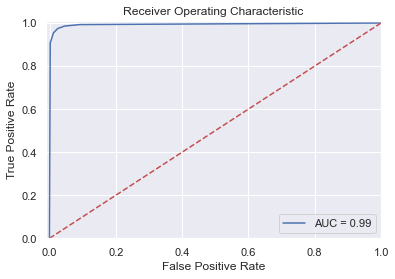

In [74]:
probs = knn_pipe.predict_proba(X_val)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_val, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

KNN juga memiliki akurasi yang tinggi, tetapi jika di bandingkan dengan XGBoost, RandomForest dan Logistic Regression K-Nearest Neighbors memiliki nilai akurasi terrendah. Dengan hasil:
- Akurasi : 97.5%
- F1-Score : 97%

#### Cross Validation Score using Train+Validation Dataset

In [75]:
t0 = time()
knn_cv = cross_val_score(knn_pipe, X_train_val, y_train_val,scoring='accuracy', cv=5)
print(knn_cv)
print('Rata-rata akurasi ',knn_cv.mean())
print('Time: ',time()-t0)

[0.97212544 0.97398374 0.97305459 0.9739777  0.97537175]
Rata-rata akurasi  0.9737026410890769
Time:  8.0455961227417


Hasil dari cross validation dengan K-Fold = 5 terhadap train+validation dataset juga memiliki nilai yang lebih rendah di bandingkan lainnya dengan nilai rata rata akurasi = 97.3%

#### Testing Set

In [76]:
knn_pipe.fit(X_train_val,y_train_val) #gabungan training dan validation data
y_pred = knn_pipe.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred)*100)
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  97.24958186210742
Confusion Matrix:
[[2604   58]
 [  90 2629]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2662
           1       0.98      0.97      0.97      2719

    accuracy                           0.97      5381
   macro avg       0.97      0.97      0.97      5381
weighted avg       0.97      0.97      0.97      5381



Dan hasil dari evaluasi model KNN dengan prediksi terhadap testing set memiliki nilai yang stabil dan konsisten dari sebelum-sebelumnya yaitu dengan nilai:
- Akurasi: 97.2%
- F1-Score : 97%

#### Model Comparison

In [77]:
validation_score = {
    'Logistic Regression':99.1,
    'Random Forest': 98.8,
    'XGBoost':98.9,
    'KNN':97.4,
}
cross_val = {
    'Logistic Regression':99.2,
    'Random Forest': 98.6,
    'XGBoost':98.9,
    'KNN':97.3,
}

testing = {
    'Logistic Regression':99.0,
    'Random Forest': 98.8,
    'XGBoost':99.1,
    'KNN':97.2,
}
compare = pd.DataFrame([validation_score,cross_val,testing],index=['Validation Score',
                                                                   'Cross Validation Score (K=5)',
                                                                   'Test data score'])

In [78]:
compare

,Logistic Regression,Random Forest,XGBoost,KNN
Validation Score,99.1,98.8,98.9,97.4
Cross Validation Score (K=5),99.2,98.6,98.9,97.3
Test data score,99.0,98.8,99.1,97.2


### Model Classifier yang digunakan : XGBoost

Saya akan menggunakan XGBoost sebagai classifier saya dalam penentuan model ini, dikarenakan akurasi terhadap testing data akurasi nya tertinggi.

### Model Improvement

In [79]:
from sklearn.model_selection import RandomizedSearchCV
max_depth = [int(x) for x in np.linspace(start = 1, stop = 20, num=10)]
min_child_weight = [int(x) for x in np.linspace(1, 10,5)]
subsample = [0.1,0.3,0.5,0.7,0.9,1]
learning_rate = [0.1,0.3,0.5,0.7,0.9,1]
random_grid = {'XGBoost__max_depth': max_depth,
               'XGBoost__min_child_weight': min_child_weight,
               'XGBoost__subsample': subsample,
               'XGBoost__learning_rate': learning_rate}

In [80]:
print(random_grid)

{'XGBoost__max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 20], 'XGBoost__min_child_weight': [1, 3, 5, 7, 10], 'XGBoost__subsample': [0.1, 0.3, 0.5, 0.7, 0.9, 1], 'XGBoost__learning_rate': [0.1, 0.3, 0.5, 0.7, 0.9, 1]}


In [81]:
xg_randomcv = RandomizedSearchCV(estimator=xg_pipe, param_distributions=random_grid,
                                 n_iter=50, cv=5, verbose=2, random_state=42, n_jobs=-1)
xg_randomcv.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.2min finished


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('XGBoost',
                                              XGBClassifier(base_score=0.5,
                                                            booster='gbtree',
                                                            colsample_bylevel=1,
                                                            colsample_bynode=1,
                                                            colsample_bytree=1,
                                                            enable_categorical=False,
                                                            gamma=0, gpu_id=-1,
                                                            importance_type=None,
                                                            interaction_constraints='',
                                                            learning_rate=0.300000012,
                                                            max_delta_step=0,
                      

In [82]:
best_xg_random = xg_randomcv.best_estimator_
best_xg_random

Pipeline(steps=[('XGBoost',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='', learning_rate=0.3,
                               max_delta_step=0, max_depth=15,
                               min_child_weight=10, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=12, num_parallel_tree=1, predictor='auto',
                               random_state=42, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=0.9,
                               tree_method='exact', validate_parameters=1,
                               verbosity=0))])

In [83]:
y_pred = best_xg_random.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred)*100)
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  99.16372421482997
Confusion Matrix:
[[2639   23]
 [  22 2697]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2662
           1       0.99      0.99      0.99      2719

    accuracy                           0.99      5381
   macro avg       0.99      0.99      0.99      5381
weighted avg       0.99      0.99      0.99      5381



ternyata hasil dari random search menghasilkan malah hasil yang lebih rendah dibandingkan dengan default parameter nya. Tetapi, saya akan mencoba menggunakan grid search di daerah yang dekat dari best parameter dari random search tadi

In [84]:
from sklearn.model_selection import GridSearchCV
param_grid = [{
    'XGBoost__max_depth': [16,17,18,19],
               'XGBoost__min_child_weight': [9,10,11],
               'XGBoost__subsample': [0.8,0.9],
               'XGBoost__learning_rate': [0.2,0.3,0.4]
}]

grid_search = GridSearchCV(estimator = xg_pipe, #classifier = Xtreme Gradient boost pipeline
                           param_grid = param_grid, #mengambil grid parameter yang di atas
                           cv=5, #k-fold = 5
                           n_jobs=-1, #pemakaian komputasi
                          verbose=2, #verbose training hyp tuning
                          )
grid_search.fit(X_train_val,y_train_val)
print(grid_search.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  4.4min finished


{'XGBoost__learning_rate': 0.4, 'XGBoost__max_depth': 16, 'XGBoost__min_child_weight': 10, 'XGBoost__subsample': 0.8}


In [85]:
best_xg_grid = grid_search.best_estimator_

In [86]:
y_pred = best_xg_grid.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred)*100)
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  99.10797249581861
Confusion Matrix:
[[2637   25]
 [  23 2696]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2662
           1       0.99      0.99      0.99      2719

    accuracy                           0.99      5381
   macro avg       0.99      0.99      0.99      5381
weighted avg       0.99      0.99      0.99      5381



Ternyata, parameter default masih memiliki nilai akurasi yang lebih tinggi dengan perbandingan nilai:
- Default parameter : 99.16% Akurasi , 99% F1 Score
- Hyp tuning : 99.10% akurasi, 99% F1 Score

### Model Inference

In [87]:
X_cleaned_train.sample().T

,468
blueFirstBlood,1
blueFirstTower,0
blueFirstBaron,0
blueFirstDragon,1
blueFirstInhibitor,0
blueDragonKills,3
blueBaronKills,0
blueTowerKills,5
blueInhibitorKills,0
blueKills,26


In [88]:
new_samp = {
    'blueFirstBlood': 1, #yes
    'blueFirstTower': 0, #no
    'blueFirstBaron': 0, #no
    'blueFirstDragon': 0, #no
    'blueFirstInhibitor': 0, #no
    'blueDragonKills': 1,
    'blueBaronKills': 1,
    'blueTowerKills': 3,
    'blueInhibitorKills': 1,
    'blueKills': 24,
    'blueDeath': 32,
    'blueAssist': 43,
    'blueChampionDamageDealt': 63723,
    'blueTotalGold': 39000,
    'blueTotalLevel': 60,
    'blueJungleMinionKills': 90,
    'blueTotalHeal': 21735,
    'blueObjectDamageDealt': 39213,
    'redDragonKills': 3,
    'redBaronKills': 2,
    'redTowerKills': 7,
    'redInhibitorKills': 3,
    'redAssist': 52,
    'redChampionDamageDealt': 72561,
    'redTotalGold': 47623,
    'redTotalLevel': 60,
    'redJungleMinionKills': 94,
    'redTotalHeal': 22937,
    'redObjectDamageDealt': 42537
}
new_samp = pd.Series(new_samp)
new_samp = pd.DataFrame(new_samp)
new_samp = new_samp.T
new_samp

,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueKills,...,redBaronKills,redTowerKills,redInhibitorKills,redAssist,redChampionDamageDealt,redTotalGold,redTotalLevel,redJungleMinionKills,redTotalHeal,redObjectDamageDealt
0,1,0,0,0,0,1,1,3,1,24,...,2,7,3,52,72561,47623,60,94,22937,42537


In [89]:
xg_pipe.predict(new_samp)

array([0], dtype=int64)

Dan hasil dari model inference sesuai dengan ekspektasi saya ketika memasukkan data, yaitu tim biru / tim dari sudut pandang utama kalah dalam match tersebut. Maka dari itu, saya sudah cukup percaya bahwa model ini sudah siap untuk di deploy

#### Pembuatan Final Pipeline

In [90]:
xg_pipe.fit(X_train_val, y_train_val)

Pipeline(steps=[('XGBoost',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=12, num_parallel_tree=1, predictor='auto',
                               random_state=42, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbosity=0))])

In [91]:
my_model = xg_pipe
import joblib
joblib.dump(my_model, "xg_finalmodel.pkl")
my_model_loaded = joblib.load("xg_finalmodel.pkl")

### Model Analysis

Model yang saya gunakan dalam penyelesaian milestone ini adalah XGBoost dengan parameter default. Dikarenakan saya sudah mencoba menggunakan 2 model improvement (Randomized searh -> Grid Search) dengan nilai yang dekat-dekat dengan default, tetapi hasil nya tetap dibawah dari default parameter walau hanya berbeda sangat sedikit. Hasil nya sangat optimal dengan akurasi yang selalu menyentuh di angka 98%++ dengan 3 validasi yaitu:
- Fit (Training data) Predict (Validation data)
- Fit (Training dan validation data) Predict (Cross Validation dari training dan validation data)
- Fit (Training dan validation data) Predict (Testing data)

### Overall Analysis

Hasil dari dataset yang saya gunakan ini dengan asumsi semua player didalam nya bermain dengan sudah minim blunder / human error dikarenakan sudah menyentuh rank ter tinggi.
<br> Untuk yang lebih detail, mungkin dapat di berikan lagi fitur hero dengan kelebihan dan kekurangan masing-masing serta item yang memiliki status gain yang mungkin bisa di perhitungkan juga ketika melakukan prediksi terhadap tim mana yang akan menang.
<br> Akan lebih menarik lagi apabila saya mendapatkan API terhadap League of Legends game, untuk sambil mencoba apakah dapat melakukan implementasi real time prediction. (Komputasi nya sudah pasti akan sangat berat)
<br> Tetapi, Model simple yang saya buat untuk Milestone ini menurut saya sudah cukup bagus untuk melakukan prediksi apakah tim User akan menang. Apabila, hasil prediksi mengatakan 'Menang' tetapi match User kalah, maka mungkin ada yang harus di improve dari user tersebut. Karena perbandingan dataset ini menggunakan rank tertinggi dalam game tersebut. 